In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from glob import glob
from functools import partial

from RaTag.scripts.wfm2read_fast import wfm2read # type: ignore
from RaTag.scripts.wfm_sca_trigger import moving_average # type: ignore
from RaTag.scripts.analyse_field_scans import * # type: ignore
from scipy.optimize import curve_fit

# Recommended rcParams for larger font sizes
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.titlesize'] = 18


# Field scan, low range

In [2]:
base_dir = '/Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/FieldScans_EL1750Vcm/'
pattern = 'FieldScan_1GSsec_EL{}_Gate{}'
fitter = GaussianFitter

area_extractor = partial(
    S2AreaExtractor,
    threshold_bs=0.07,
    integ_window=(1e-6, 3.5e-5),
    bs_t_window=(-1.5e-5, -1.0e-5),
    bs_v_window=(-0.005, 0.005)
)

In [3]:
analyzer = FieldScanAnalyzer(
    base_dir,
    n_files=3000,
    pattern=pattern,
    areaExtractor=area_extractor,
    fitter=GaussianFitter,
    hist_cuts=(-5, 120),
    nbins=120,
    EL_gap=0.8,
    drift_gap=1.4
)

 [2100  700]
 [2150  750]
 [2200  800]
 [2600 1200]
 [3100 1700]
 [3600 2200]
 [4100 2700]] V


In [4]:
s2_areas_cuts, s2_areas = analyzer.analyze();

Integrating 3000 files for EL 1450 V, Gate 50 V
Integrating 3000 files for EL 1460 V, Gate 60 V
Integrating 3000 files for EL 1465 V, Gate 65 V
Integrating 3000 files for EL 1470 V, Gate 70 V
Integrating 3000 files for EL 1475 V, Gate 75 V
Integrating 3000 files for EL 1500 V, Gate 100 V
Integrating 3000 files for EL 1550 V, Gate 150 V
Integrating 3000 files for EL 1650 V, Gate 250 V
Integrating 3000 files for EL 1750 V, Gate 350 V
Integrating 3000 files for EL 1850 V, Gate 450 V
Integrating 3000 files for EL 1950 V, Gate 550 V
Integrating 3000 files for EL 2000 V, Gate 600 V
Integrating 3000 files for EL 2050 V, Gate 650 V
Integrating 3000 files for EL 2100 V, Gate 700 V
Integrating 2997 files for EL 2150 V, Gate 750 V
Integrating 3000 files for EL 2200 V, Gate 800 V
Integrating 3000 files for EL 2600 V, Gate 1200 V
Integrating 3000 files for EL 3100 V, Gate 1700 V
Integrating 3000 files for EL 3600 V, Gate 2200 V
Integrating 3000 files for EL 4100 V, Gate 2700 V


<Axes: title={'center': 'Drift field scan, EL field: 1750.0 kV/cm'}, xlabel='S2 Area (mV*us)', ylabel='Counts'>

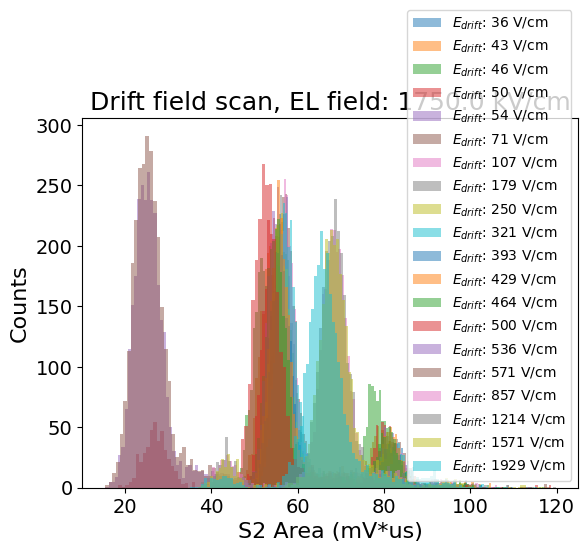

In [5]:
analyzer.plot_histograms()

50 V: amplitude=274.96, mean=56.59, sigma=2.15)
50 V: amplitude=35.17, mean=82.86, sigma=2.29)
60 V: amplitude=229.99, mean=53.48, sigma=2.34)
60 V: amplitude=56.99, mean=79.53, sigma=2.62)
65 V: amplitude=215.80, mean=52.02, sigma=2.43)
65 V: amplitude=99.55, mean=78.04, sigma=-2.20)
70 V: amplitude=266.48, mean=54.25, sigma=2.33)
70 V: amplitude=60.31, mean=80.32, sigma=2.49)
75 V: amplitude=284.55, mean=55.04, sigma=2.18)
75 V: amplitude=51.41, mean=81.07, sigma=2.20)
100 V: amplitude=279.22, mean=57.00, sigma=2.35)
100 V: amplitude=28.12, mean=82.37, sigma=4.02)
150 V: amplitude=294.24, mean=56.95, sigma=2.13)
150 V: amplitude=36.10, mean=83.02, sigma=2.19)
250 V: amplitude=257.76, mean=56.36, sigma=2.19)
250 V: amplitude=37.89, mean=82.05, sigma=2.81)
350 V: amplitude=260.93, mean=55.90, sigma=2.23)
350 V: amplitude=39.62, mean=81.73, sigma=2.54)
450 V: amplitude=275.45, mean=57.24, sigma=2.25)
450 V: amplitude=33.35, mean=83.25, sigma=2.66)
550 V: amplitude=242.64, mean=55.94, si

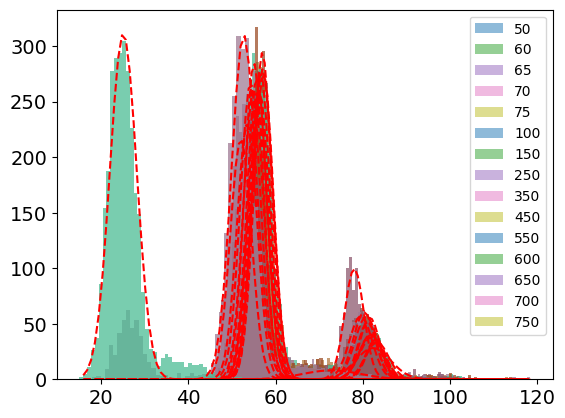

In [6]:
analyzer.fit_histograms_2peaks(sep_A=70);

<Axes: title={'center': 'Mean S2 Area vs $E_{drift}$ (95% CI)'}, xlabel='$E_{drift}$ (V/cm)', ylabel='Mean S2 Area (mV$\\cdot$us)'>

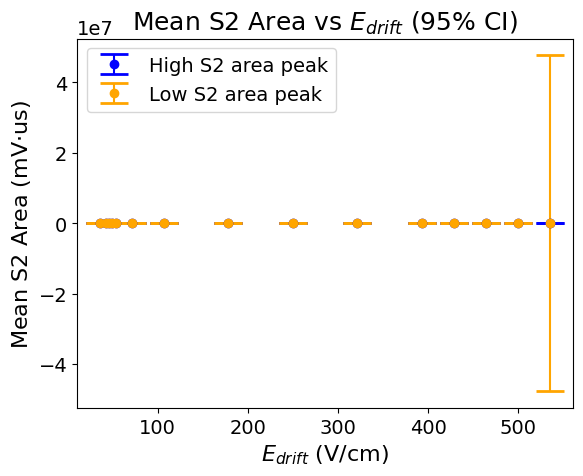

In [7]:
analyzer.plot_s2_vs_field()

In [8]:
fields_over_lim = check_fields(analyzer.voltage_pairs, analyzer.E_el, analyzer.E_drift )
E_el0, E_drift = fields_over_lim[0]


 [2100  700]
 [2150  750]
 [2200  800]
 [2600 1200]
 [3100 1700]
 [3600 2200]
 [4100 2700]] V


In [18]:
print([round(e, 1) for e in analyzer.E_drift])

[35.7, 42.9, 46.4, 50.0, 53.6, 71.4, 107.1, 178.6, 250.0, 321.4, 392.9, 428.6, 464.3, 500.0, 535.7, 571.4, 857.1, 1214.3, 1571.4, 1928.6]


[Text(0.5, 0, 'Drift Field (V/cm)'),
 Text(0, 0.5, 'S2 Area (PE)'),
 Text(0.5, 1.0, 'S2 Area vs Drift Field at EL=1750 V/cm')]

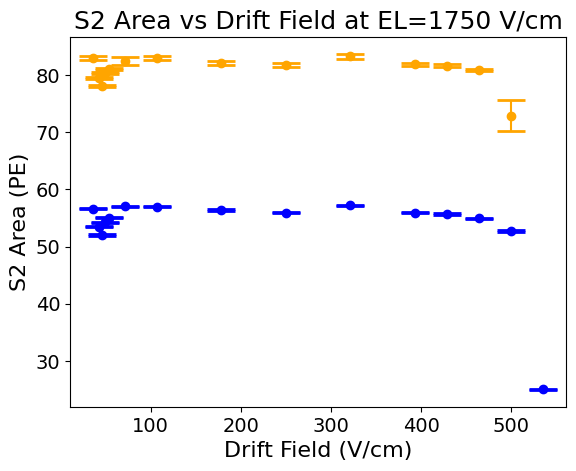

In [9]:
mean_p1, ci95_p1 = zip(*analyzer.fit_results_p1.values())
mean_p2, ci95_p2 = zip(*analyzer.fit_results_p2.values())
E_d = [analyzer.E_dr_dict[v] for v in analyzer.fit_results_p1.keys()]
ax = plt.gca()
ax.errorbar(E_d, mean_p1, yerr=ci95_p1, fmt='o', color='blue', capsize=10, capthick=2, label='High S2 area peak')
ax.errorbar(E_d[:-1], mean_p2[:-1], yerr=ci95_p2[:-1], fmt='o', color='orange', capsize=10, capthick=2, label='Low S2 area peak')
ax.set(xlabel='Drift Field (V/cm)', ylabel='S2 Area (PE)', title='S2 Area vs Drift Field at EL=1750 V/cm')